In [1]:
from work.pca import *
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
src_path= r'D:\Clarifruit\cherry_stem\data\unet_data\training\2019-09-30_07-19-46\thres_0.4\bgr_histograms'
df= load_npy_data(src_path)
df.head()

,file_name,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,38357-02789.png,0.070614,0.015590,0.011005,0.022927,0.022927,0.022927,0.028429,0.032097,0.032097,...,0.012155,0.013260,0.009945,0.008840,0.006630,0.005525,0.013260,0.011050,0.007735,0.064091
1,38357-12440.png,0.084137,0.027345,0.029448,0.035758,0.041017,0.033655,0.046275,0.041017,0.075723,...,0.001435,0.007177,0.007177,0.007177,0.007177,0.000000,0.004306,0.002871,0.001435,0.031577
2,38357-13707.png,0.098665,0.016209,0.019028,0.024666,0.026076,0.034533,0.028190,0.031009,0.048628,...,0.006315,0.009924,0.014434,0.009924,0.009021,0.010826,0.009021,0.006315,0.001804,0.046009
3,38357-27009.png,0.120237,0.023246,0.024047,0.024849,0.032063,0.033666,0.036071,0.053706,0.056110,...,0.005757,0.003838,0.007676,0.003838,0.004798,0.011514,0.006717,0.003838,0.005757,0.028786
4,38357-42160.png,0.061693,0.009871,0.016451,0.023855,0.018097,0.027145,0.032903,0.035371,0.035371,...,0.003998,0.001999,0.005997,0.005997,0.007995,0.005997,0.007995,0.003998,0.009994,0.035979


In [3]:
y=df['file_name']
x=df.drop('file_name',axis=1)

In [29]:
n_comp = 11
# PCA
print('\nRunning PCA ...')
pca = IncrementalPCA(n_components=n_comp)
X_pca = pca.fit_transform(x)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.8996
Individual variance contributions:
0.5489584799299946
0.17431559521681314
0.0545330594857132
0.03498844557421794
0.025385146400120122
0.01899648669099447
0.012533211449045442
0.009784604906019099
0.008626227680095027
0.0064024435822695545
0.005034988848178589


In [41]:
X_pca[0]

array([-0.63036095,  0.81614371, -0.3904704 ,  0.02479626,  0.00469854,
       -0.04357757,  0.22528503, -0.12581088,  0.14511087,  0.06665049,
       -0.06112315])

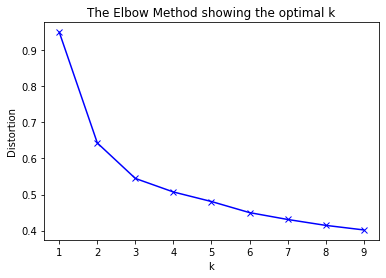

In [5]:
plt.plot()
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_pca)
    distortions.append(sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_pca.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
pred = KMeans(n_clusters=3).fit_predict(X_pca)
np.unique(pred)

array([0, 1, 2])

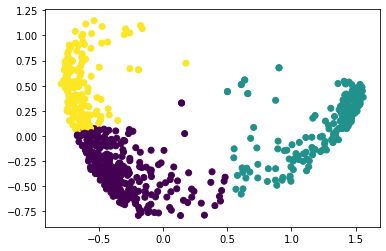

In [31]:
pca_plt_data = X_pca[:,:2]
plt.figure()
plt.scatter(pca_plt_data[:,0],pca_plt_data[:,1],c=pred)

In [36]:
res = list(zip(y,pred))

In [37]:
res[0]

('38357-02789.png', 2)

In [38]:
save_path=r'D:\Clarifruit\cherry_stem\data\unet_data\training\2019-09-30_07-19-46\thres_0.4\classification_preds'
img_path = r'D:\Clarifruit\cherry_stem\data\raw_data\images_orig'


In [39]:
from work.stem_classifier.classify import get_pred_via_list


get_pred_via_list(res,save_path, img_path,img_extention='.png.jpg')